In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import shap

In [16]:
X, y = shap.datasets.nhanesi()
features = X.columns.tolist()
data = X.assign(target = y)
data.head()

,sex_isFemale,age,physical_activity,serum_albumin,alkaline_phosphatase,alkaline_phosphatase_isUnacceptable,alkaline_phosphatase_isTestnotdone,SGOT,SGOT_isUnacceptable,SGOT_isTestnotdone,...,urine_hematest_isBlankbutapplicable,sedimentation_rate,sedimentation_rate_isBlankbutapplicable,uric_acid,uric_acid_isUnacceptable,uric_acid_isTestnotdone,systolic_blood_pressure,pulse_pressure,bmi,target
20751,False,51,3,NaN,85.0,False,False,NaN,True,False,...,False,NaN,False,6.2,False,False,110.0,40.0,25.406803,-16.916667
20753,False,41,2,NaN,68.0,False,False,2.27,False,False,...,False,NaN,False,7.7,False,False,136.0,54.0,24.588331,-17.166667
20754,True,31,2,NaN,61.0,False,False,1.86,False,False,...,False,NaN,False,4.9,False,False,110.0,24.0,23.756502,-17.666667
20755,False,48,2,NaN,58.0,False,False,NaN,True,False,...,False,NaN,False,8.4,False,False,126.0,36.0,28.610011,-17.250000
20756,True,29,3,NaN,37.0,False,False,1.69,False,False,...,False,NaN,False,4.3,False,False,98.0,36.0,19.216489,-17.083333


<AxesSubplot:ylabel='Frequency'>

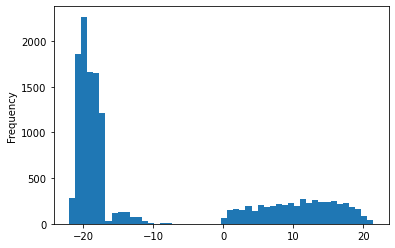

In [10]:
data.target.plot.hist(bins=50)

In [15]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

reg = CatBoostRegressor(verbose=False)
train, test = train_test_split(data, test_size=.25)

In [17]:
reg.fit(train[features], train['target'])

In [18]:
exp = shap.Explainer(reg)
shap_values = exp(test[features])

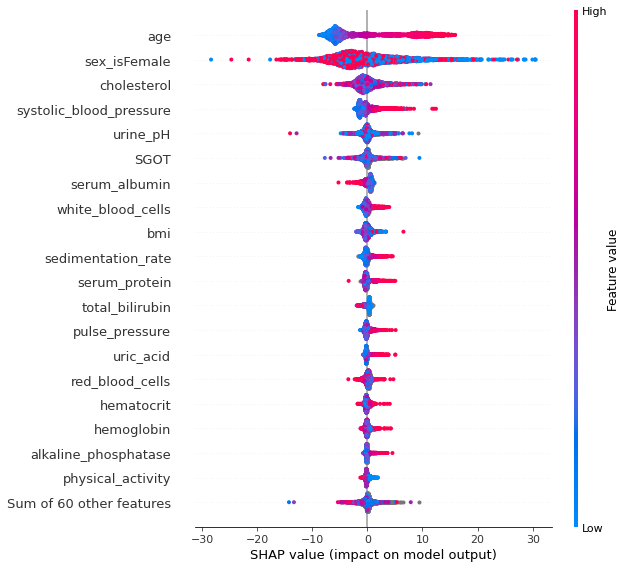

In [85]:
shap.plots.beeswarm(shap_values, max_display=20)

In [62]:
shap_values.values

array([[-2.85574874e+00, -6.25119447e+00,  1.18624085e-02, ...,
        -1.52698302e+00, -2.12703242e-01, -2.27946138e-02],
       [ 2.41050030e+01, -1.75905351e-01,  4.61209896e-02, ...,
         1.99361864e+00,  2.23016244e+00,  3.25534089e-01],
       [-4.87499127e+00, -6.60969955e+00, -1.46817801e-01, ...,
        -1.23162377e+00, -2.35805348e-01,  6.42365801e-01],
       ...,
       [-3.62766043e+00,  1.00913304e+01, -2.79110718e-01, ...,
         3.52886825e-01,  3.46156693e-01,  3.27694007e-01],
       [-5.62408165e-01, -1.64530207e+00, -1.93694068e-01, ...,
         2.08291014e+00,  6.80064488e-01,  1.05695462e+00],
       [-8.36824616e+00,  7.41679377e+00, -2.05078814e-01, ...,
        -3.60670884e-01, -9.20115525e-02, -1.51849566e+00]])

In [63]:
shap_test_df = pd.DataFrame(shap_values.values, columns=features)

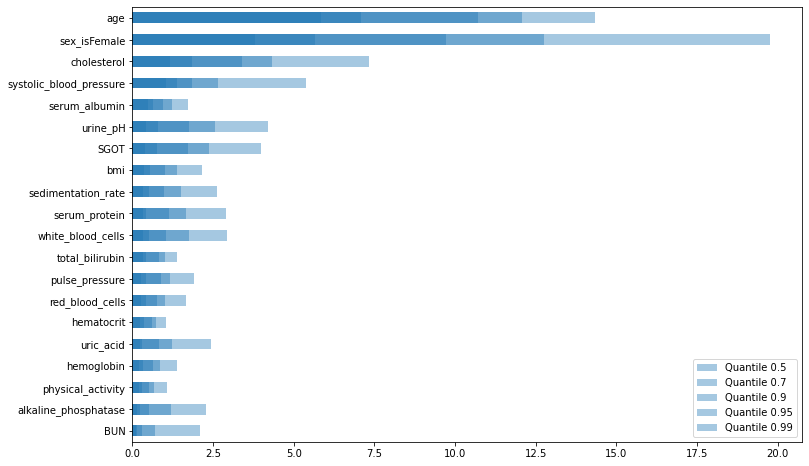

In [84]:
plt.figure(figsize=(12, 8))
quantiles = shap_test_df.abs().quantile([.5, .7, .9, .95, .99]).T.sort_values(.5).tail(20)
for q in quantiles.columns:
    quantiles[q].plot.barh(alpha=.4, label=f'Quantile {q}')
plt.legend()